In [42]:
import numpy as np
import matplotlib.pyplot as plt
from single_layer_delta_rule import Single_Layer_Delta_Rule
from two_layer_perceptron import Two_Layer_Delta_Rule
import activation_functions as act_funs

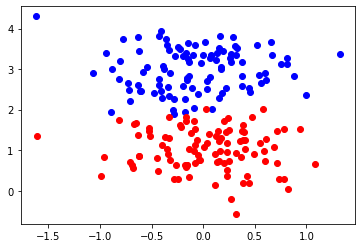

In [43]:
n = 100
mA = np.array([0, 3])
mB = np.array([0, 1])
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros([n,2])
classB = np.zeros([n,2])
classA[:,0] = np.random.normal(mA[0], sigmaA, n)
classA[:,1] = np.random.normal(mA[1], sigmaA, n)
classB[:,0] = np.random.normal(mB[0], sigmaB, n)
classB[:,1] = np.random.normal(mB[1], sigmaB, n)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

In [44]:
classA.shape

(100, 2)

In [45]:
data = np.concatenate((classA, classB), axis=0)
labels = np.array([1]*n + [0]*n)

data_labels = np.concatenate((data, labels.reshape(n*2,1)), axis=1)
#np.random.shuffle(data_labels)

X = data_labels[:,:2].T
T_percept = data_labels[:,2].reshape(n*2, 1).T
T_delta = np.copy(T_percept)
for i, t in enumerate(T_percept[0,:]):
    if t == 0:
        T_delta[0,i] = -1

In [50]:
delta_two = Two_Layer_Delta_Rule(X, T_delta, 2)

Obtained error 31.44476088171344


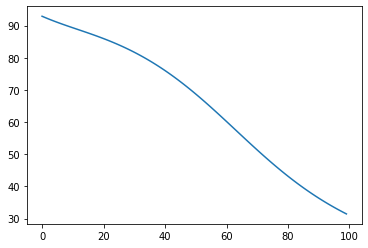

In [51]:
delta_two.epochs = 100
#delta.eta = 0.001
delta_two.train('batch')
delta_two.plot_errors()

In [52]:
miss_classified = 0
for i in range(delta_two.X.shape[1]):
    x = delta_two.X[:,i]
    t = delta_two.T[:,i]
    y = delta_two.classification_function(x)
    if t != y:
        miss_classified += 1
print(miss_classified)
    

4


Number of missclassified: 4


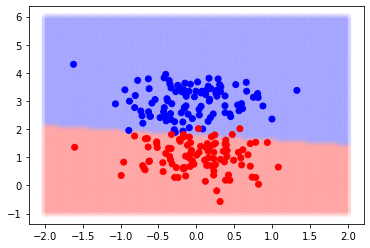

In [53]:
print("Number of missclassified:", miss_classified)
delta_two.plot_decision_boundary()

In [118]:
delta_single = Single_Layer_Delta_Rule(X, T_delta)

Obtained error 17.811178090301624


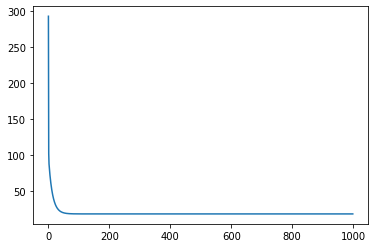

In [119]:
delta_single.epochs = 1000
#delta_single.eta = 0.001
delta_single.train('batch')
delta_single.plot_errors()

In [121]:
miss_classified = 0
for i in range(delta_single.X.shape[1]):
    x = delta_single.X[:,i]
    t = delta_single.T[:,i]
    y = np.sign(np.matmul(delta_single.W_train, x))
    if t != y:
        miss_classified += 1
print(miss_classified)

2


Number of missclassified: 2


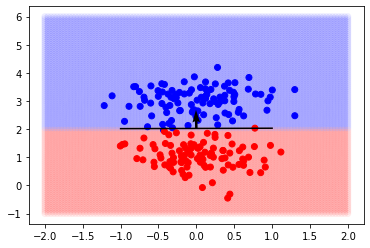

In [122]:
print("Number of missclassified:", miss_classified)
delta_single.plot_decision_boundary()

We can see that the two layer perceptron outperforms the single layer perceptron

## Encoder problem

In [77]:
X_enc = -np.ones([8, 8])
for i in range(X_enc.shape[0]):
    X_enc[i,i] = 1
T_enc = np.copy(X_enc.T)

In [78]:
encoder = Two_Layer_Delta_Rule(X_enc, T_enc, 3)

Obtained error 2.6484746762063374


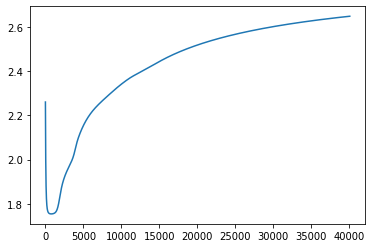

In [53]:
encoder.epochs = 10000
encoder.train('batch')
encoder.plot_errors()

In [62]:
miss_classified = 0
for i in range(encoder.X.shape[1]):
    success = True
    x = encoder.X[:,i]
    t = encoder.T[:,i]
    low_repr = act_funs.shifted_sigmoid(np.matmul(encoder.W1_train, x))
    y = encoder.classification_function(x)
    if not np.array_equal(t, y):
        success = False
        miss_classified += 1
    print("X = {}, Y = {}, Success: {}".format(x,y,success))
    print("Low representation of X:", np.around(low_repr), "\n")
print("Miss classfied:", miss_classified)

X = [ 1. -1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1.  1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1. -1.  1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1.  1. -1. -1. -1. -1. -1.], Success: True
Low representation of X: [-1. -0. -1.] 

X = [-1. -1. -1.  1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1.  1. -1. -1. -1. -1.], Success: True
Low representation of X: [-1. -0. -0.] 

X = [-1. -1. -1. -1.  1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-0. -0. -0.] 

X = [-1. -1. -1. -1. -1.  1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1.  1. -1. -1.], Success: True
Low representation of X: [-1. -1.  1.] 

X = [-1. -1. -1. -1. -1. -1.  1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1.  1. -1.], Success: True
Low representation of X: [ 0. -1. -1.] 

X = [-1. -1. -1. -1. -1. -1. -1.  1.  

In [66]:
encoder = Two_Layer_Delta_Rule(X_enc, T_enc, 2)

Obtained error 1.8742000522459064


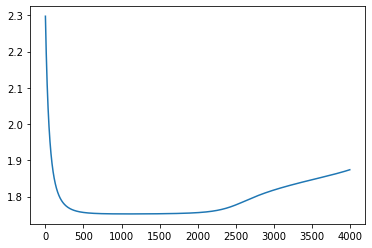

In [69]:
encoder.epochs = 10000
encoder.train('batch')
encoder.plot_errors()

In [70]:
miss_classified = 0
for i in range(encoder.X.shape[1]):
    success = True
    x = encoder.X[:,i]
    t = encoder.T[:,i]
    low_repr = act_funs.shifted_sigmoid(np.matmul(encoder.W1_train, x))
    y = encoder.classification_function(x)
    if not np.array_equal(t, y):
        success = False
        miss_classified += 1
    print("X = {}, Y = {}, Success: {}".format(x,y,success))
    print("Low representation of X:", np.around(low_repr), "\n")
print("Miss classfied:", miss_classified)

X = [ 1. -1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -0.] 

X = [-1.  1. -1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1.  1. -1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1.  1. -1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1.  1. -1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1. -1.  1. -1. -1.  1.], Y = [-1. -1. -1. -1. -1.  1. -1. -1.], Success: True
Low representation of X: [-1.  0.] 

X = [-1. -1. -1. -1. -1. -1.  1. -1.  1.], Y = [-1. -1. -1. -1. -1. -1. -1. -1.], Success: False
Low representation of X: [-1. -1.] 

X = [-1. -1. -1. -1. -1. -1. -1.  1.  1.], Y = [-1. -1. -1. -1.

## Function approximation

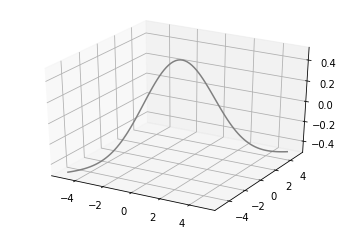

In [54]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5
ax.plot3D(x_line, y_line, z_line, 'gray')

plt.show()

In [55]:
targets = np.array(z_line).reshape(len(z_line),1)
x_line = x_line.reshape(len(x_line), 1)
y_line = y_line.reshape(len(y_line), 1)
patterns = np.concatenate((x_line, y_line), axis = 0)

In [63]:
fun_approx = Two_Layer_Delta_Rule(patterns, targets, 10)

Obtained error 0.12084589651837843


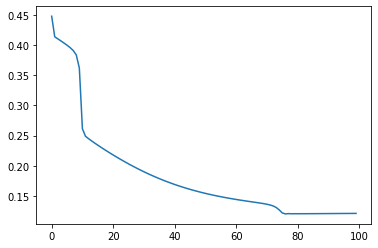

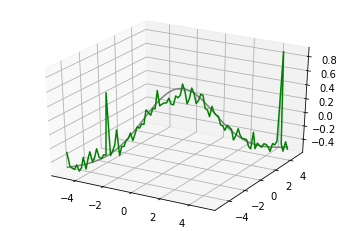

In [64]:
fun_approx.epochs = 100
fun_approx.train()
fun_approx.plot_errors()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5
approx = fun_approx.classification_function(fun_approx.X, False)[:,0]
ax.plot3D(x_line, y_line, z_line, 'gray')
ax.plot3D(x_line, y_line, approx, 'green')

In [184]:
import random
train_size = round(targets.shape[0]*0.7)
train_indeces = sorted(random.sample(range(0, targets.shape[0]), train_size))
#train_indeces = list(range(train_size))

In [185]:
train_patterns = patterns[train_indeces].reshape(train_size, 1)
train_targets = targets[train_indeces].reshape(train_size, 1)

In [214]:
fun_approx = Two_Layer_Delta_Rule(train_patterns, train_targets, 12)

Obtained error 0.1190987696580432


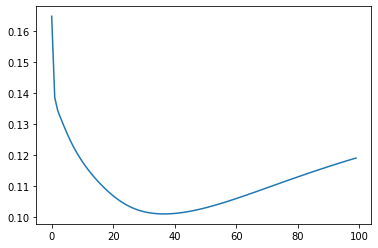

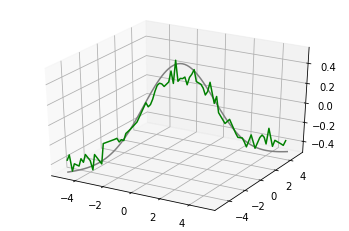

In [215]:
fun_approx.epochs = 100
fun_approx.train()
fun_approx.plot_errors()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

x_line = np.linspace(-5, 5, 100)
y_line = np.linspace(-5, 5, 100)
z_line = np.exp(-(np.square(x_line) + np.square(x_line))/10) - 0.5

fun_patterns = fun_approx.X_add_bias(train_patterns)
approx = fun_approx.classification_function(fun_patterns, False)[:,0]
#x_line_train = np.linspace(-5, 5, 100)[train_indeces]
#y_line_train = np.linspace(-5, 5, 100)[train_indeces]

ax.plot3D(x_line, y_line, z_line, 'gray')
ax.plot3D(x_line[train_indeces], y_line[train_indeces], approx, 'green')

In [201]:
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25)